In [105]:
# !pip install plotly
# !pip install mpl_interactions
# !pip install ipywidgets
# !pip install eurostat
# !pip install praw

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import requests
from io import StringIO

from dotenv import load_dotenv
# Library that has a lot of operating system functions
from os import getenv
import time

In [3]:
# Source: https://data.gov.ie/dataset/national-house-construction-cost-index?package_type=dataset
# License: Creative Commons Attribution Share-Alike 4.0
# Accessed: 26 April 2023
nhci_df = pd.read_csv("https://opendata.housing.gov.ie/dataset/aefa3fae-0ca1-4694-867a-a8a70ea77397/resource/188485c4-e5d7-4406-996b-1ff12a9a045a/download/national_house_construction_cost_index_0.csv", header=[1], skiprows=1)

In [4]:
nhci_df.head()

Month   1994   1995   1996   1997   1998   1999   2000   2001   2002   
0   January  109.2  113.5  115.9    118  122.9  126.3  135.8  154.3  169.9  \
1  February  109.3  114.1  115.7  118.5  123.1  126.4  136.1  154.7    170   
2     March  109.4  114.1  115.9  118.8  123.8  126.5  136.4  155.6  169.5   
3     April  110.3  114.1  115.9  119.8  123.8  130.5  136.5  157.4  169.5   
4       May  110.1  114.1  115.9  119.8  124.5  130.5  136.8  157.6  169.5   

   ...   2007   2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  ...  198.8  207.4    208  206.9  210.2  202.5  204.1  204.9  206.2  207.4  
1  ...  198.8  208.2  207.3  207.2  210.5  202.6  204.2  205.4    206  207.1  
2  ...  199.4  208.6  206.8  207.3  200.7  202.7  204.3  205.4  206.5    NaN  
3  ...    200  208.9  206.5  207.9    201  203.4  204.5  205.6  206.8    NaN  
4  ...  200.1  209.4  206.5  208.7  201.2  203.6  204.5  205.9  207.2    NaN  

[5 rows x 24 columns]

In [5]:
nhci_df.shape

(14, 24)

In [6]:
nhci_df.tail()

Month   1994   1995   1996   1997   1998   1999   
9                       October  112.7  115.8  117.1    122  126.2  134.7  \
10                     November  112.9  115.9  117.2  122.6  126.2  134.8   
11                     December  113.1  115.9  117.2  122.6  126.1  134.9   
12               Yearly average    111  114.7  116.3  120.4  124.9    131   
13  % Increase on previous year  3.40%  3.30%  1.40%  3.50%  3.70%  4.90%   

     2000    2001   2002  ...   2007   2008    2009   2010    2011   2012   
9   153.8   169.3  173.9  ...  203.8  210.1   206.2  209.5     202  203.8  \
10  153.8   169.4    174  ...  203.8  209.9   206.2  209.5   202.2    204   
11  153.9   169.3  174.1  ...  204.2  209.3   206.2  209.8   202.3  204.2   
12    141   161.5  171.8  ...  201.7  209.4   206.5  208.7   203.1  203.5   
13  7.60%  14.50%  6.40%  ...  3.90%  3.80%  -1.40%  1.10%  -2.70%  0.20%   

     2013   2014   2015 2016  
9   205.4  206.7  207.2  NaN  
10  205.4  206.5  207.6  NaN  
11  204.7  206.2  207.4  NaN  
12  204.7    206  207.1  NaN  
13  0.60%  0.60%  0.50%  NaN  

[5 rows x 24 columns]

In [7]:
# Source: https://data.gov.ie/dataset/beq04-onstruction-sector-base-2015100-by-type-of-building-and-construction-year-and-statistic-fb86?package_type=dataset
# License: Creative Commons Attribution 4.0
#Accessed: 27 April 2023
total_production_indices_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BEQ04/CSV/1.0/en")

In [8]:
total_production_indices_df.head()

STATISTIC                                    Statistic Label  TLIST(Q1)   
0  BEQ04C01  Value of Production Index in Building and Cons...      20001  \
1  BEQ04C01  Value of Production Index in Building and Cons...      20001   
2  BEQ04C01  Value of Production Index in Building and Cons...      20001   
3  BEQ04C01  Value of Production Index in Building and Cons...      20001   
4  BEQ04C01  Value of Production Index in Building and Cons...      20001   

  Quarter C02402V02895       Type of Building and Construction           UNIT   
0  2000Q1            -           All building and construction  Base 2015=100  \
1  2000Q1           11  Building (excluding civil engineering)  Base 2015=100   
2  2000Q1          111                    Residential building  Base 2015=100   
3  2000Q1          112                Non-residential building  Base 2015=100   
4  2000Q1           12                       Civil engineering  Base 2015=100   

        VALUE  
0  143.514977  
1  182.795802  
2  279.281551  
3  115.359508  
4   60.438887

In [9]:
total_production_indices_df.shape

(1840, 8)

In [10]:
total_production_indices_df['STATISTIC'].unique()

array(['BEQ04C01', 'BEQ04C02', 'BEQ04C03', 'BEQ04C04'], dtype=object)

In [11]:
total_production_indices_df['Statistic Label'].unique()

array(['Value of Production Index in Building and Construction',
       'Volume of Production Index in Building and Construction',
       'Value of Production Index in Building and Construction (Seasonally Adjusted)',
       'Volume of Production Index in Building and Construction (Seasonally Adjusted)'],
      dtype=object)

In [12]:
total_production_indices_df['Year'] = total_production_indices_df['TLIST(Q1)'] // 10
total_yearly_production_indices_df = total_production_indices_df.groupby(['Year', 'STATISTIC', 'Statistic Label', 'Type of Building and Construction']).mean('VALUE').reset_index()

In [13]:
total_yearly_production_indices_df.head()

Year STATISTIC                                    Statistic Label   
0  2000  BEQ04C01  Value of Production Index in Building and Cons...  \
1  2000  BEQ04C01  Value of Production Index in Building and Cons...   
2  2000  BEQ04C01  Value of Production Index in Building and Cons...   
3  2000  BEQ04C01  Value of Production Index in Building and Cons...   
4  2000  BEQ04C01  Value of Production Index in Building and Cons...   

        Type of Building and Construction  TLIST(Q1)       VALUE  
0           All building and construction    20002.5  155.852221  
1  Building (excluding civil engineering)    20002.5  199.844255  
2                       Civil engineering    20002.5   63.619979  
3                Non-residential building    20002.5  121.431248  
4                    Residential building    20002.5  311.698160

In [14]:
fig = px.line(total_production_indices_df, x="Quarter", y="VALUE",
              color="STATISTIC", hover_data=['Statistic Label'],
              title='Indices of Total Production in Building and Construction Sector')
fig.show()

In [15]:
fig = go.Figure()
for i in total_yearly_production_indices_df['STATISTIC'].unique():
    data = total_yearly_production_indices_df.query(f"STATISTIC=='{i}'")
    for j in data['Type of Building and Construction'].unique():
        data2 = data.loc[data["Type of Building and Construction"] == j]
        fig.add_trace(go.Scatter(x=data2['Year'], y=data2['VALUE'], mode='lines',
            name=f"{i}-{j}",
            connectgaps=True,
        ))
fig.update_layout(
    plot_bgcolor='white'
)
fig.show()

In [16]:
fig = go.Figure()
for i in total_production_indices_df['STATISTIC'].unique():
    data = total_production_indices_df.query(f"STATISTIC=='{i}'")
    for j in data['Type of Building and Construction'].unique():
        data2 = data.loc[data["Type of Building and Construction"] == j]
        fig.add_trace(go.Scatter(x=data2['Quarter'], y=data2['VALUE'], mode='lines',
            name=f"{i}-{j}",
            connectgaps=True,
        ))
fig.update_layout(
    plot_bgcolor='white'
)
fig.show()

In [17]:
# Source: 
# License: 
planning_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BHQ08/CSV/1.0/en")
planning_df.head()

STATISTIC               Statistic Label C01921V02511   
0     BHQ08  Planning Permissions Granted            -  \
1     BHQ08  Planning Permissions Granted            -   
2     BHQ08  Planning Permissions Granted            -   
3     BHQ08  Planning Permissions Granted            -   
4     BHQ08  Planning Permissions Granted            -   

         Type of Development C02074V02506        Functional Category   
0  All types of construction            -  All functional categories  \
1  All types of construction            -  All functional categories   
2  All types of construction            -  All functional categories   
3  All types of construction            -  All functional categories   
4  All types of construction            -  All functional categories   

  C02196V02652 Region  TLIST(Q1) Quarter    UNIT   VALUE  
0            -  State      20091  2009Q1  Number  7486.0  
1            -  State      20092  2009Q2  Number  6756.0  
2            -  State      20093  2009Q3  Number  6655.0  
3            -  State      20094  2009Q4  Number  5137.0  
4            -  State      20101  2010Q1  Number  4519.0

In [18]:
planning_df['Statistic Label'].unique()

array(['Planning Permissions Granted'], dtype=object)

In [19]:
planning_df['Type of Development'].unique()

array(['All types of construction', 'New construction', 'Extensions',
       'Alteration and Conversion'], dtype=object)

In [20]:
planning_df['Functional Category'].unique()

array(['All functional categories', 'Dwellings', 'Commercial Buildings',
       'Buildings for Agriculture', 'Industrial Buildings',
       'Govt., Health and Education', 'Other Buildings for Social Use',
       'Civil Engineering', 'Other functional categories'], dtype=object)

In [21]:
planning_df['Region'].unique()

array(['State', 'Border, Midland and Western', 'Border', 'Midland',
       'West', 'Southern and Eastern', 'Dublin', 'Mid-East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [22]:
%matplotlib inline

In [23]:
# Define dropdown list options based on unique values of columns
dev_types = planning_df['Type of Development'].unique()
functional_categories = planning_df['Functional Category'].unique()
quarters = planning_df['Quarter'].unique()
regions = planning_df['Region'].unique()

# Create dropdown widgets for the unique values
# select_column = widgets.Dropdown(options=['Type of Development', 'Functional Category', 'Quarter', 'Region'],
#                                 value='Type of Development', description='X Label')
select_type = widgets.Dropdown(options=dev_types, value=dev_types[0], description="Dev Type")
select_fc = widgets.Dropdown(options=functional_categories, value=functional_categories[0], description="Functional Category")
select_quarter = widgets.Dropdown(options=quarters, value=quarters[-1], description="Quarter")
select_region = widgets.Dropdown(options=regions, value=regions[0], description="Region")

In [24]:
# Define a function to update the plot based on the selected value
def update_plot(selected_fc, selected_quarter, selected_region):
    fig=plt.figure(figsize=(15,6))
    filtered_data = planning_df[(planning_df['Functional Category'] == selected_fc) & 
                                (planning_df['Quarter'] == selected_quarter) &
                                (planning_df['Region'] == selected_region)
                               ]
    plt.clf()
    plt.bar(filtered_data['Type of Development'], filtered_data['VALUE'])
    plt.title(f"Planning Permissions Granted - {selected_fc}, {selected_quarter}, {selected_region}")
    plt.xlabel("Type of Development")
    plt.show()
    
widgets.interactive(update_plot, selected_fc=select_fc, selected_quarter=select_quarter, selected_region=select_region)

interactive(children=(Dropdown(description='Functional Category', options=('All functional categories', 'Dwell…

In [25]:
# Source: https://data.gov.ie/dataset/beq04-onstruction-sector-base-2015100-by-type-of-building-and-construction-year-and-statistic-fb86?package_type=dataset
# License: Creative Commons Attribution 4.0
total_production_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BEQ04/CSV/1.0/en")
total_production_df.head()

STATISTIC                                    Statistic Label  TLIST(Q1)   
0  BEQ04C01  Value of Production Index in Building and Cons...      20001  \
1  BEQ04C01  Value of Production Index in Building and Cons...      20001   
2  BEQ04C01  Value of Production Index in Building and Cons...      20001   
3  BEQ04C01  Value of Production Index in Building and Cons...      20001   
4  BEQ04C01  Value of Production Index in Building and Cons...      20001   

  Quarter C02402V02895       Type of Building and Construction           UNIT   
0  2000Q1            -           All building and construction  Base 2015=100  \
1  2000Q1           11  Building (excluding civil engineering)  Base 2015=100   
2  2000Q1          111                    Residential building  Base 2015=100   
3  2000Q1          112                Non-residential building  Base 2015=100   
4  2000Q1           12                       Civil engineering  Base 2015=100   

        VALUE  
0  143.514977  
1  182.795802  
2  279.281551  
3  115.359508  
4   60.438887

In [26]:
total_production_df['Statistic Label'].unique()

array(['Value of Production Index in Building and Construction',
       'Volume of Production Index in Building and Construction',
       'Value of Production Index in Building and Construction (Seasonally Adjusted)',
       'Volume of Production Index in Building and Construction (Seasonally Adjusted)'],
      dtype=object)

In [27]:
total_production_df['Type of Building and Construction'].unique()

array(['All building and construction',
       'Building (excluding civil engineering)', 'Residential building',
       'Non-residential building', 'Civil engineering'], dtype=object)

In [28]:
types_construction = total_production_df['Type of Building and Construction'].unique()
select_types_cons = widgets.Dropdown(options=types_construction, value=types_construction[0], description='Type of Building and Construction')

In [29]:
# Define a function to update the plot based on the selected value
def update_plot(selected_type_cons):
    fig=plt.figure(figsize=(15,6))
    filtered_data = total_production_df[(total_production_df['Type of Building and Construction'] == selected_type_cons)]
    plt.clf()
    for stat_label in filtered_data['Statistic Label'].unique():
        stat_filtered_data = filtered_data[filtered_data['Statistic Label'] == stat_label]
        plt.plot(stat_filtered_data['Quarter'], stat_filtered_data['VALUE'], label=stat_label)
    plt.title(f"Indices of Total Production in Building and Construction Sector (Base 2015=100) - {selected_type_cons}")
    plt.xlabel("Quarter")
    plt.legend()
    plt.show()
    
widgets.interactive(update_plot, selected_type_cons=select_types_cons)

interactive(children=(Dropdown(description='Type of Building and Construction', options=('All building and con…

In [30]:
# Source: https://data.gov.ie/dataset/nda01-new-dwelling-completions?package_type=dataset
# License: Creative Commons Attribution 4.0

dwelling_completion_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NDA01/CSV/1.0/en")
dwelling_completion_df.head()

STATISTIC           STATISTIC Label  TLIST(A1)  Year C03349V04063   
0     NDA01  New Dwelling Completions       2012  2012            -  \
1     NDA01  New Dwelling Completions       2012  2012          A41   
2     NDA01  New Dwelling Completions       2012  2012          A42   
3     NDA01  New Dwelling Completions       2012  2012          A45   
4     NDA01  New Dwelling Completions       2012  2012          A63   

      Eircode Output    UNIT  VALUE  
0                All  Number   4911  
1  A41: Ballyboughal  Number      5  
2    A42: Garristown  Number     11  
3       A45: Oldtown  Number      1  
4    A63: Greystones  Number     50

In [31]:
dwelling_completion_df.shape

(1540, 8)

In [32]:
dwelling_completion_df['STATISTIC Label'].unique()

array(['New Dwelling Completions'], dtype=object)

In [33]:
eircodes = dwelling_completion_df['Eircode Output'].unique()
select_eircode = widgets.Dropdown(options=eircodes, value=eircodes[0], description="Eircode Output")
# Define a function to update the plot based on the selected value
def update_plot(selected_eircode):
    fig=plt.figure(figsize=(15,6))
    filtered_data = dwelling_completion_df[(dwelling_completion_df['Eircode Output'] == selected_eircode)]
    plt.clf()
    plt.plot(filtered_data['Year'], filtered_data['VALUE'], label='New Dwellings Completion')
    plt.title(f"New Dwellings Completion - {selected_eircode}")
    plt.xlabel("Year")
    plt.legend()
    plt.show()
    
widgets.interactive(update_plot, selected_eircode=select_eircode)

interactive(children=(Dropdown(description='Eircode Output', options=('All', 'A41: Ballyboughal', 'A42: Garris…

In [34]:
# Source: https://data.gov.ie/dataset/ndq04-esb-connections?package_type=dataset
# License: Creative Commons Attribution 4.0

esb_connections_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NDQ04/CSV/1.0/en")
esb_connections_df.head()

STATISTIC  STATISTIC Label  TLIST(Q1) Quarter C03451V04162   
0     NDQ04  ESB Connections      20111  2011Q1           01  \
1     NDQ04  ESB Connections      20111  2011Q1           02   
2     NDQ04  ESB Connections      20111  2011Q1           03   
3     NDQ04  ESB Connections      20111  2011Q1           04   
4     NDQ04  ESB Connections      20111  2011Q1            -   

        Type of Connection    UNIT  VALUE  
0  New dwelling completion  Number   1875  
1               Unfinished  Number    383  
2             Reconnection  Number    241  
3             Non-Dwelling  Number    205  
4          All connections  Number   2704

In [35]:
esb_connections_df['Type of Connection'].unique()

array(['New dwelling completion', 'Unfinished', 'Reconnection',
       'Non-Dwelling', 'All connections'], dtype=object)

In [36]:
connection_types = esb_connections_df['Type of Connection'].unique()
select_conn_type = widgets.Dropdown(options=connection_types, value=connection_types[0], description="Type of Connection")

# Define a function to update the plot based on the selected value
def update_plot(selected_conn_type):
    fig=plt.figure(figsize=(15,6))
    filtered_data = esb_connections_df[(esb_connections_df['Type of Connection'] == selected_conn_type)]
    plt.clf()
    plt.plot(filtered_data['Quarter'], filtered_data['VALUE'], label='ESB Connections')
    plt.title(f"ESB Connections - {selected_conn_type}")
    plt.xlabel("Quarter")
    plt.legend()
    plt.show()
    
widgets.interactive(update_plot, selected_conn_type=select_conn_type)

interactive(children=(Dropdown(description='Type of Connection', options=('New dwelling completion', 'Unfinish…

In [37]:
# Source: https://data.gov.ie/dataset/employment-and-investment-incentive-eii-statistics?package_type=dataset
# License: Creative Commons Attribution 4.0

employment_investment_df = pd.read_csv("https://www.revenue.ie/en/corporate/documents/statistics/tax-expenditures/eii-distribution-investment-amounts.csv",
                                       storage_options={'User-Agent': 'Mozilla/5.0'}) # To address HTTP Error 403: ModSecurity Action
employment_investment_df.head()

range_amount_from_euro  range_amount_to_euro   
0                       1               10000.0  \
1                   10001               20000.0   
2                   20001               30000.0   
3                   30001               40000.0   
4                   40001               50000.0   

   distruibution_investment_2018  fund_distruibution_per_invester_2018   
0                          202.0                                 148.0  \
1                          217.0                                 154.0   
2                          227.0                                  96.0   
3                           83.0                                  38.0   
4                          146.0                                 180.0   

   distruibution_investment_2017  fund_distruibution_per_invester_2017   
0                          392.0                                 157.0  \
1                          342.0                                 119.0   
2                          380.0                                  90.0   
3                          140.0                                  37.0   
4                          235.0                                 185.0   

   distruibution_investment_2016  fund_distruibution_per_invester_2016   
0                            434                                 161.0  \
1                            397                                 112.0   
2                            432                                  71.0   
3                            158                                  39.0   
4                            316                                 209.0   

   distruibution_investment_2015  fund_distruibution_per_invester_2015   
0                            430                                  66.0  \
1                            358                                  43.0   
2                            337                                  24.0   
3                            103                                  14.0   
4                            271                                  40.0   

   distruibution_investment_2014  fund_distruibution_per_invester_2014   
0                            406                                 100.0  \
1                            313                                  43.0   
2                            304                                  43.0   
3                             92                                  37.0   
4                            217                                   NaN   

   distruibution_investment_2013  fund_distruibution_per_invester_2013   
0                          466.0                                  79.0  \
1                          317.0                                  61.0   
2                          280.0                                  45.0   
3                          108.0                                  17.0   
4                          171.0                                  34.0   

   distruibution_per_invester_2011_2012   
0                                 417.0  \
1                                 257.0   
2                                 247.0   
3                                  90.0   
4                                 156.0   

   fund_distruibution_per_invester_2011_2012  
0                                       98.0  
1                                       61.0  
2                                       35.0  
3                                       11.0  
4                                       38.0

In [38]:
employment_investment_df.shape

(12, 16)

In [39]:
# Source: https://ec.europa.eu/eurostat/web/products-datasets/-/teiis500
# eu_prod_construction_df = pd.read_csv("https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/teiis500.tsv.gz", delimiter="\t")
# https://wikis.ec.europa.eu/display/EUROSTATHELP/API+SDMX+2.1+-+data+query
url = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/teiis500?format=TSV"
res = requests.get(url)
res

<Response [200]>

In [40]:
eu_prod_construction = res.text

In [53]:
eu_prod_construction_df = pd.read_csv(StringIO(eu_prod_construction), delimiter='\t')
eu_prod_construction_df.head()

freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD 2022-04  2022-05  2022-06    
0                      M,PROD,F,I2015_SCA,AT   133.9    133.4    130.4   \
1                      M,PROD,F,I2015_SCA,BE    98.8     99.4     98.7    
2                      M,PROD,F,I2015_SCA,BG    89.9     91.8     90.4    
3                      M,PROD,F,I2015_SCA,CZ   112.5    109.8    109.4    
4                      M,PROD,F,I2015_SCA,DE   112.7    113.8    113.1    

  2022-07  2022-08  2022-09  2022-10  2022-11  2022-12  2023-01  2023-02    
0   128.8    130.2    129.3    130.2    132.8    128.8    133.7   151.5 p  \
1   100.5     99.2     98.2     98.4    100.0     99.5     98.1    101.0    
2    89.9     90.2     90.0     90.6     90.9     89.4     89.8    89.2 p   
3   105.9    107.5    105.7    108.6    108.6    108.4    113.9    109.7    
4   112.2    110.9    110.9    113.3    111.1    103.2    116.9    117.2    

  2023-03   
0       :   
1       :   
2       :   
3       :   
4   111.8

In [54]:
eu_prod_construction_df.shape

(75, 13)

In [55]:
for country in eu_prod_construction_df['freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD'].unique():
    if "DE" in country:
        print(country)

M,PROD,F,I2015_SCA,DE
M,PROD,F,PCH_M12_CA,DE
M,PROD,F,PCH_M1_SCA,DE


There are three units of measurement:
- Index,2015=100 (SCA)
- Percentage change m/m-1 (SCA)
- Percentage change m/m (CA)

In [56]:
# Taking out country, and unit of measurement to separate columns
eu_prod_construction_df['country'] = eu_prod_construction_df['freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD'].apply(lambda x: x.split(',')[4])
eu_prod_construction_df['stats'] = eu_prod_construction_df['freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD'].apply(lambda x: x.split(',')[3])

In [57]:
eu_prod_construction_df.head()

freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD 2022-04  2022-05  2022-06    
0                      M,PROD,F,I2015_SCA,AT   133.9    133.4    130.4   \
1                      M,PROD,F,I2015_SCA,BE    98.8     99.4     98.7    
2                      M,PROD,F,I2015_SCA,BG    89.9     91.8     90.4    
3                      M,PROD,F,I2015_SCA,CZ   112.5    109.8    109.4    
4                      M,PROD,F,I2015_SCA,DE   112.7    113.8    113.1    

  2022-07  2022-08  2022-09  2022-10  2022-11  2022-12  2023-01  2023-02    
0   128.8    130.2    129.3    130.2    132.8    128.8    133.7   151.5 p  \
1   100.5     99.2     98.2     98.4    100.0     99.5     98.1    101.0    
2    89.9     90.2     90.0     90.6     90.9     89.4     89.8    89.2 p   
3   105.9    107.5    105.7    108.6    108.6    108.4    113.9    109.7    
4   112.2    110.9    110.9    113.3    111.1    103.2    116.9    117.2    

  2023-03  country      stats  
0       :       AT  I2015_SCA  
1       :       BE  I2015_SCA  
2       :       BG  I2015_SCA  
3       :       CZ  I2015_SCA  
4   111.8       DE  I2015_SCA

In [58]:
eu_prod_construction_df.drop(columns=['freq,indic_bt,nace_r2,unit,geo\TIME_PERIOD'], axis=1, inplace=True)
eu_prod_construction_df = eu_prod_construction_df.melt(id_vars=['stats', 'country'], var_name='month', value_name="value")

In [59]:
eu_prod_construction_df.head()

stats country     month   value
0  I2015_SCA      AT  2022-04   133.9 
1  I2015_SCA      BE  2022-04    98.8 
2  I2015_SCA      BG  2022-04    89.9 
3  I2015_SCA      CZ  2022-04   112.5 
4  I2015_SCA      DE  2022-04   112.7

In [61]:
# eu_prod_construction_df[eu_prod_construction_df['country'] == 'DE']

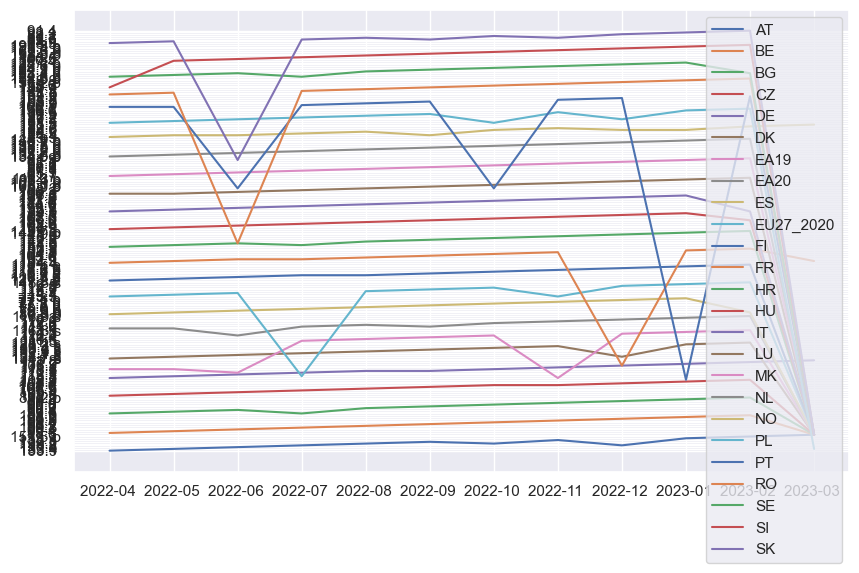

In [67]:
# sns.set(rc={'figure.figsize':(10,6)})
eu_prod_construction_index_df = eu_prod_construction_df[eu_prod_construction_df['stats'] == 'I2015_SCA']
for geo in eu_prod_construction_index_df['country'].unique():
    geo_prod_cons_df = eu_prod_construction_index_df[eu_prod_construction_index_df['country'] == geo]
    plt.plot(geo_prod_cons_df['month'], geo_prod_cons_df['value'], label=geo)

# plt.plot(eu_prod_construction_df[(eu_prod_construction_df['country'] == 'DE') & (eu_prod_construction_df['stats'] == 'I2015_SCA')]['month'], eu_prod_construction_df[(eu_prod_construction_df['country'] == 'DE') & (eu_prod_construction_df['stats'] == 'I2015_SCA')]['value'])
plt.legend()
plt.show()

<Axes: xlabel='month', ylabel='value'>

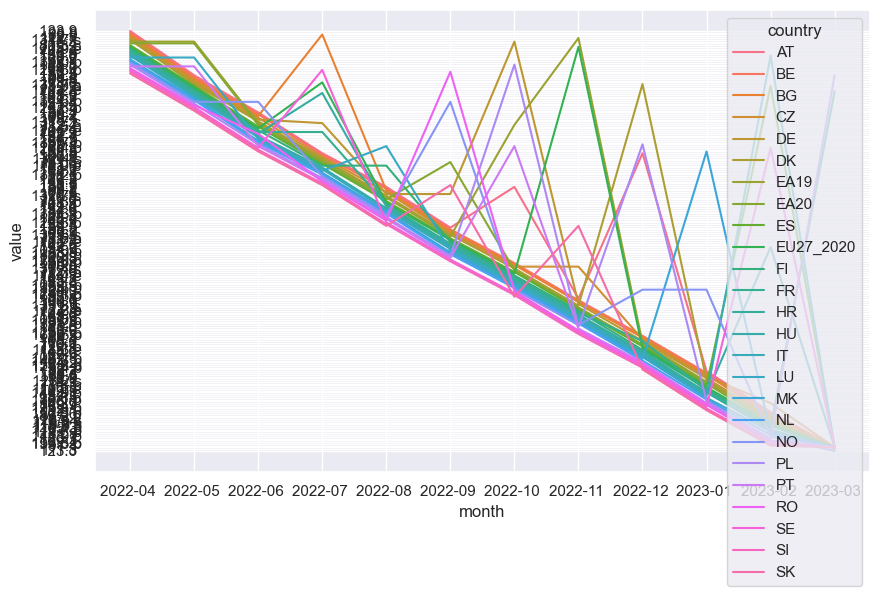

In [62]:
sns.lineplot(data=eu_prod_construction_df[eu_prod_construction_df['stats']=='I2015_SCA'], x='month', y='value', hue='country')

### Reddit data

In [68]:
# Load from the .env
load_dotenv()

# Get the Reddit credentials from environmental variables
APP_NAME = getenv('APP_NAME')
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
USERNAME = getenv('REDDIT_USERNAME')
PASSWORD = getenv('PASSWORD')

In [69]:
# Check that the variables all loaded
if APP_NAME and APP_ID and APP_SECRET and USERNAME and PASSWORD:
    print("Credentials loaded")
else:
    print("ERROR: Credentials not loaded!!")

Credentials loaded


In [70]:
# Sets up the authentication part of the request
auth = requests.auth.HTTPBasicAuth(f'{APP_ID}', f'{APP_SECRET}')

# Sets up the data we want to send: our login method (password), username, and password
data = {'grant_type': 'password',
        'username': f'{USERNAME}',
        'password': f'{PASSWORD}'}

# Sets up this requests header info, which gives reddit a brief description of our app
# This is the format requested by Reddit: os:app_name:version (by /u/username)
headers = {'User-Agent': f'macos:{APP_NAME}:v1.0 (by /u/{USERNAME})'}

# Makes the request to the access_token api endpoint, and saves the response in res
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# Converts response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# Adds authorisation to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# While the token is valid (~2 hours) we can just add headers=headers to our requests to prove authentication
# Making a test request. <Response [200]> means that it was a success!
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [88]:
res = requests.get("https://oauth.reddit.com/search?q=irish%20construction",
                   headers=headers)

In [89]:
len(res.json()['data']['children'])

25

In [90]:
# Loop through all the results, printing the titles of each
for post in res.json()['data']['children']:
    print(post['data']['title'])

Hi guys, I'm a storeman and part-time psych student doing my final thesis for my degree. I'm doing a research study on stress and job satisfaction in Irish construction workers. I need about 100 participants to take part in a short survey.
"I build houses, but don't have one." - Irish construction worker living on the streets of Dublin.
Irish construction stl
Sharp decline in Irish construction activity in July
I need an ELI5 on the Irish construction industry's
Irish construction giant debuts its first all-electric JCB
[Business] - Irish construction giant debuts its first all-electric JCB | Irish Times
[Business] - Irish construction giant debuts its first all-electric JCB
[Business] - Surge in activity in Irish construction sector continues in August | Irish Times
[Business] - Surge in activity in Irish construction sector continues in August
Irish New Housing Markets Continue to Under perform - If output of new dwellings continues to grow at 11.8% per annum indefinitely, Irish cons

In [121]:
# Searching for a keyword within sub-reddit for last 1 year and sort by comments
# https://www.reddit.com/dev/api#GET_search
params = {'limit': 100, 'restrict_sr': 1, 'sr_nsfw': 1, 't': 'year', 'sort': 'comments'}
keyword = "construction"
search_results = []

for i in range(100):
#     print(params)
    res = requests.get(
        f"https://oauth.reddit.com/r/ireland/search?q={keyword}",
        headers=headers,
        params=params
    )
    
    results = res.json()['data']['children']
    search_results.extend(results)
    
    # Get the ID of last post and start next search after it
    try:
        fullname = f"{post['kind']}_{results[-1]['data']['id']}"
        # This tells the API that the post we want is the one after the current one in the queue (ie is the next oldest one).
        params['after'] = fullname
        # Sleeping for 1 second to not exceed Reddit's API limits
        time.sleep(1)
    except:
        print(f"No search results found! Last result ID: {params['after']}")
        break

No search results found
Last result ID: t3_uq8qen


In [122]:
# Total search results for the keyword
len(search_results)

139

In [127]:
search_results[0]['data']['permalink']

'/r/ireland/comments/10mgkxn/why_should_we_work/'

In [169]:
comments = []
for post in search_results:
    # Get comments for each post
    res = requests.get(
        f"https://oauth.reddit.com{post['data']['permalink']}",
        headers=headers
    )   
    comments.extend(res.json()[1]['data']['children'])

In [172]:
len(comments)

2158

In [178]:
res.json()[0]['data']['children'][0]['data']

{'approved_at_utc': None,
 'subreddit': 'ireland',
 'selftext': "What are peoples thoughts on this course? Specifically in NUIG or UL. \n\nI have an interest in business, I do higher level maths and I also have an interest in the construction industry though I did not get to study construction studies for the LC. I am just wondering if people think this is a course worth doing and if a career in project management/construction is worth pursuing. I understand a lot of it is about communicating with people/organising them. \n\nI have accommodation in NUIG, but I have heard that UL's Co-op programme is a lot better for work experience and lasts around 8 months compared to 3-4 months at NUIG. Which would people recommend?\n\nAny advice appreciated!",
 'user_reports': [],
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'Thoughts on Project and Construction Management Course',
 'link_flair_richtext': [],
 'subreddit_name_prefixed': 'r/ireland',
 'hidden

In [174]:
# comments

In [167]:
# Define a function to extract the reply body from a comment or a reply
# It takes reply as input and returns its body or list of bodies
def extract_reply_body(reply):
    if reply['kind'] == 't1':
        # If the reply is a comment, extract the comment body
        return reply['data']['body']
    elif reply['kind'] == 'Listing':
        # If the reply is a listing of replies, traverse the listing and extract the reply bodies
        reply_bodies = []
        for child in reply['data']['children']:
            reply_body = extract_reply_body(child)
            if reply_body:
                reply_bodies.append(reply_body)
        return reply_bodies

In [173]:
# Loop through the comments and extract the reply bodies
for comment in comments:
    reply_bodies = extract_reply_body(comment)
    if reply_bodies:
        print(reply_bodies)

First; this is perfectly, perfectly human way to feel.  Honestly, there is no shame in it - you're talking about things we all feel on some level and the hushing it up, insulting or whatever else people get for this feeling is not appropriate at all.

But to answer your question - she didn't get given a house.  Right? She doesn't own it, she will never own it. She is being given the loan of a roof over her and her kids head (which as you say, is obviously better than living on the street).

You and your partner are paying off a house. You will have a house at the end of it.  One that you can sell or give to your children.  There's a big difference.

The bigger problem that you're talking about though is one I see all over the place in so many contexts; why does my colleague get to take off work on 'mental health' break just because she's feeling a bit down, shur we could all do that, am I being punished for being healthy?  I work my life away and your man on the dole has access to free